In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("./drive/MyDrive/TimeSeries/daily-minimum-temperatures-in-me.csv")

In [19]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [21]:
df.rename(columns={"Daily minimum temperatures": "Temperature"}, inplace=True)

In [22]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexLocator

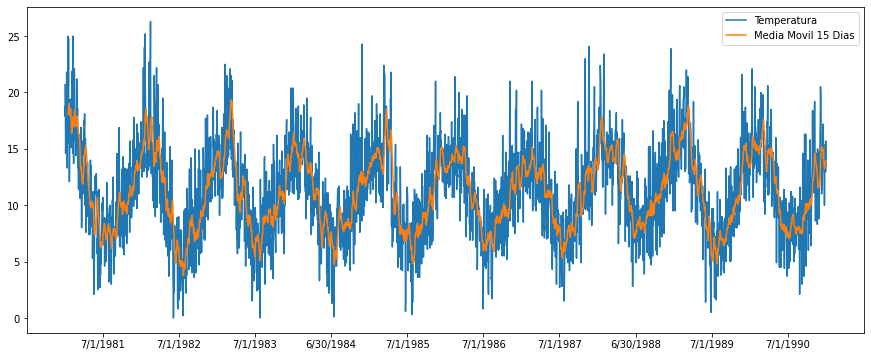

In [43]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["Date"],df["Temperature"],label="Temperatura")
df['media_movil_15d'] = df['Temperature'].rolling(window=15).mean()
ax.plot(df["Date"],df["media_movil_15d"],label="Media Movil 15 Dias")

locator = IndexLocator(base=365, offset=181)
ax.xaxis.set_major_locator(locator)

plt.legend()
plt.show()

(array([ 13.,  14.,  26.,  35.,  55.,  91., 146., 203., 215., 265., 276.,
        321., 271., 284., 275., 269., 215., 186., 181., 105.,  61.,  39.,
         32.,  31.,  17.,  12.,   3.,   4.,   4.,   1.]),
 array([ 0.        ,  0.87666667,  1.75333333,  2.63      ,  3.50666667,
         4.38333333,  5.26      ,  6.13666667,  7.01333333,  7.89      ,
         8.76666667,  9.64333333, 10.52      , 11.39666667, 12.27333333,
        13.15      , 14.02666667, 14.90333333, 15.78      , 16.65666667,
        17.53333333, 18.41      , 19.28666667, 20.16333333, 21.04      ,
        21.91666667, 22.79333333, 23.67      , 24.54666667, 25.42333333,
        26.3       ]),
 <BarContainer object of 30 artists>)

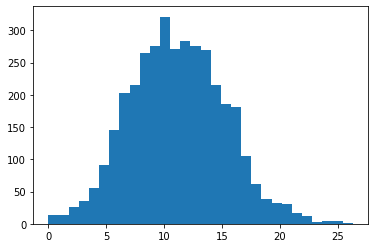

In [46]:
_,ax1=plt.subplots()
ax1.hist(df["Temperature"],bins=30)

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

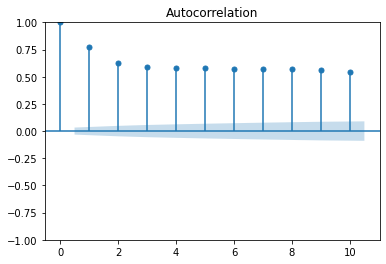

[1.         0.774268   0.6302866  0.58529312 0.57774567 0.57728013
 0.57510412 0.57437039 0.56782622 0.56120131 0.54668689]


In [52]:
plot_acf(df['Temperature'], lags=10)
plt.show()
acf_vals = acf(df['Temperature'], nlags=10)
print(acf_vals)

In [ ]:
#Es estacional
#Varianza ctte
#Presenta un ciclo anual con minimos en julio
#Es una gaussiana de media 11
#Alta autocorrelacion con valores retrasados levemente, aunque luego la correlacion disminuye bastante